In [1]:
#importing required packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',50) #display columns upto 50.

In [3]:
#reading the train.csv file as a pandas DataFrame
train_df = pd.read_csv("train.csv")

In [4]:
train_df.head(2)

id property_type        room_type  \
0  6901257     Apartment  Entire home/apt   
1  6304928     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   

   bed_type cancellation_policy  cleaning_fee city  \
0  Real Bed              strict          True  NYC   
1  Real Bed              strict          True  NYC   

                                         description first_review  \
0  Beautiful, sunlit brownstone 1-bedroom in the ...    6/18/2016   
1  Enjoy travelling during your stay in Manhattan...   08-05-2017   

  host_has_profile_pic host_identity_verified host_response_rate host_since  \
0                    t                      t                NaN  3/26/2012   
1                    t                      f               100%  6/19/2017   

  instant_bookable last_review   latitude  longitude  \
0                f   7/18/2016  40.696524 -73.991617   
1                t   9/23/2017  40.766115 -73.989040   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   

   number_of_reviews  review_scores_rating  \
0                  2                 100.0   
1                  6                  93.0   

                                       thumbnail_url zipcode  bedrooms  beds  \
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...   11201       1.0   1.0   
1  https://a0.muscache.com/im/pictures/348a55fe-4...   10019       3.0   3.0   

   log_price      
0   5.010635 NaN  
1   5.129899 NaN

In [5]:
#List of features in the given data.
train_df.columns

Index(['id', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds', 'log_price', ' '],
      dtype='object')

In [6]:
# train_df.info()

In [7]:
#reading the test.csv file as a pandas DataFrame
test_df = pd.read_excel('test.xlsx')

In [8]:
# test_df.head()

In [9]:
# test_df.info()

In [10]:
del train_df[' '] #removing empty column from the train_dataset

In [11]:
del test_df[' '] #removing empty column from the test_dataset

In [12]:
#creating identifiers in the train, test datasets
train_df['data'] = 'train'
test_df['data'] = 'test'

In [13]:
#Creating an empty target variable in test to hold same number of columns as train.
test_df['log_price'] = np.nan

In [14]:
#Joining the datasets for combined pre-processing.
df_all = pd.concat([train_df,test_df], axis=0)

In [15]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74110 entries, 0 to 24110
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74110 non-null  int64  
 1   property_type           74110 non-null  object 
 2   room_type               74110 non-null  object 
 3   amenities               74110 non-null  object 
 4   accommodates            74110 non-null  int64  
 5   bathrooms               73910 non-null  float64
 6   bed_type                74110 non-null  object 
 7   cancellation_policy     74110 non-null  object 
 8   cleaning_fee            74110 non-null  bool   
 9   city                    74110 non-null  object 
 10  description             74109 non-null  object 
 11  first_review            58246 non-null  object 
 12  host_has_profile_pic    73922 non-null  object 
 13  host_identity_verified  73922 non-null  object 
 14  host_response_rate      55811 non-null

In [16]:
df_all.describe()

id  accommodates     bathrooms      latitude     longitude  \
count  7.411000e+04  74110.000000  73910.000000  74110.000000  74110.000000   
mean   1.126653e+07      3.155175      1.235266     38.445926    -92.397775   
std    6.081726e+06      2.153589      0.582047      3.080175     21.705361   
min    3.440000e+02      1.000000      0.000000     33.338905   -122.511500   
25%    6.261961e+06      2.000000      1.000000     34.127908   -118.342380   
50%    1.225413e+07      2.000000      1.000000     40.662137    -76.996971   
75%    1.640216e+07      4.000000      1.000000     40.746093    -73.954661   
max    2.123090e+07     16.000000      8.000000     42.390437    -70.985047   

       number_of_reviews  review_scores_rating      bedrooms          beds  \
count       74110.000000          57388.000000  74019.000000  73979.000000   
mean           20.900810             94.067488      1.265797      1.710877   
std            37.828839              7.836569      0.852149      1.254148   
min             0.000000             20.000000      0.000000      0.000000   
25%             1.000000             92.000000      1.000000      1.000000   
50%             6.000000             96.000000      1.000000      1.000000   
75%            23.000000            100.000000      1.000000      2.000000   
max           605.000000            100.000000     10.000000     18.000000   

          log_price  
count  49999.000000  
mean       4.781831  
std        0.716910  
min        1.609438  
25%        4.317488  
50%        4.709530  
75%        5.220356  
max        7.600402

In [17]:
df_all.isnull().sum()

id                            0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   1
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          4
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
log_price                 24111
data                          0
dtype: int64

### Cleaning individual columns

#### Checking the null values in `host_has_profile_pic`, `host_identity_verified` & `host_since`         

In [18]:
len(df_all[df_all.loc[ :,['host_since','host_has_profile_pic', 'host_identity_verified'] ].isnull().sum(axis=1) == 3])
#As these three columns have 188 rows empty, removing them from data.  

188

In [19]:
df_all.dropna(subset = ['host_since'], inplace=True)

#### `host_response_rate`

In [20]:
print('Null Values:', df_all.host_response_rate.isna().sum())

print(f"Proportion of Null Values: {round(df_all.host_response_rate.isna().sum()/len(df_all)*100,1)}%")

Null Values: 18111
Proportion of Null Values: 24.5%


In [21]:
#removing &sign from the column and converting it into numeric object.
df_all['host_response_rate'] = df_all['host_response_rate'].str[:-1].astype('float64')

In [22]:
print("Mean host response rate:", round(df_all['host_response_rate'].mean(),0))
print("Median host response rate:", df_all['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df_all.host_response_rate == 100.0).sum()/df_all.host_response_rate.count())*100,1)}%")

Mean host response rate: 94.0
Median host response rate: 100.0
Proportion of 100% host response rates: 77.3%


In [23]:
#as 77% of hosts respond 100%, and about 25% of values being NULL, binning these feature into suitable categories.

df_all['host_response_rate'] = pd.cut(df_all['host_response_rate'],
                                     bins = [0,50,90,99,100],
                                     labels = ['0-49%','50-89%','90-99%','100%'],
                                     include_lowest=True)

In [24]:
#converting the column to string
df_all['host_response_rate'] = df_all['host_response_rate'].astype('str')

#Replace null values with 'unknown' category
df_all['host_response_rate'].replace('nan','unknown',inplace=True)

#category counts
df_all['host_response_rate'].value_counts()

unknown    36261
100%       29124
50-89%      4945
90-99%      2169
0-49%       1423
Name: host_response_rate, dtype: int64

#### `property_type`

In [25]:
df_all['property_type'].value_counts()

Apartment             48840
House                 16503
Condominium            2653
Townhouse              1685
Loft                   1241
Other                   607
Guesthouse              498
Bed & Breakfast         461
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                76
In-law                   71
Cabin                    71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Cave                      2
Train                     2
Parking Space             1
Lighthouse                1
Island                    1
Casa particular           1
Name: property_type,

In [26]:
#property_type has too many categories with a few listings. Binning them into Apartment, House, and Other.

df_all['property_type'].replace({
    'Townhouse':'House',
    'Guesthouse':'House',
    'Bungalow':'House',
    'Villa':'House',
    'Loft':'Apartment',
    'Serviced apartment':'Apartment',
    'Earth House':'House',
    'Chalet':'House',
    'Treehouse':'House',
    'Vacation home':'House'
}, inplace=True)

#merging remaining categories into 'Other'

df_all.loc[~df_all.property_type.isin(['House','Apartment']), 'property_type'] = 'Other'

In [27]:
df_all['property_type'].value_counts()

Apartment    50102
House        19259
Other         4561
Name: property_type, dtype: int64

#### `bed_type`

In [28]:
df_all['bed_type'].value_counts()

Real Bed         71846
Futon              750
Pull-out Sofa      582
Airbed             477
Couch              267
Name: bed_type, dtype: int64

In [29]:
print(f"proportion of real bed: {sum(df_all.bed_type=='Real Bed')/len(df_all)*100}%")

proportion of real bed: 97.1916344254755%


In [30]:
# As most of the listings have same bed type, it won't be advantageous to have this feature. Hence, dropping it.

del df_all['bed_type']

#### `bathrooms`, `bedrooms`, & `beds`

In [31]:
# Imputing nan's with median to avoid fractions.

for col in ['bathrooms','bedrooms','beds']:
    df_all[col].fillna(df_all[col].median(), inplace=True)

#### `cancellation_policy`

In [32]:
df_all['cancellation_policy'].value_counts()

strict             32295
flexible           22484
moderate           19014
super_strict_30      112
super_strict_60       17
Name: cancellation_policy, dtype: int64

In [33]:
#merging super_strict columns into the strict ones as they do not constitute much of the listings.

df_all['cancellation_policy'].replace({
    'super_strict_30' : 'strict',
    'super_strict_60' : 'strict'
}, inplace=True)

#### `amenities`

In [34]:
#sneak-peak into amenities
df_all['amenities'][:1].values

array(['{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Essentials,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}'],
      dtype=object)

In [35]:
#Creating a set of all possible amenities

amenities_list = list(df_all['amenities'])
amenities_list_str = " ".join(amenities_list)
amenities_list_str = amenities_list_str.replace('{','')
amenities_list_str = amenities_list_str.replace('}',',')
amenities_list_str = amenities_list_str.replace('"','')

amenities_set = [x.strip() for x in amenities_list_str.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air purifier',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Bath towel',
 'Bathtub',
 'Bathtub with shower chair',
 'Beach essentials',
 'Beachfront',
 'Bed linens',
 'Body soap',
 'Breakfast',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Changing table',
 'Childrenâ€™s books and toys',
 'Childrenâ€™s dinnerware',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Cooking basics',
 'Crib',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Doorman Entry',
 'Dryer',
 'EV charger',
 'Elevator',
 'Elevator in building',
 'Essentials',
 'Ethernet connection',
 'Extra pillows and blankets',
 'Family/kid friendly',
 'Fire extinguisher',
 'Fireplace guards',
 'Firm matress',
 'Firm mattress',
 'First aid kit',
 'Fixed grab bars

In [36]:
# Converting useful amenities into features that might have an effect on Price.

df_all.loc[df_all['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df_all.loc[df_all['amenities'].str.contains('Air conditioning'), 'air_conditioning'] = 1
df_all.loc[df_all['amenities'].str.contains('Air purifier|Game console|Buzzer/wireless intercom|Wireless Internet|Room-darkening shades'), 'high_end_electronics'] = 1
df_all.loc[df_all['amenities'].str.contains('BBQ grill|Stove|Cooking basics|Microwave|Oven|Refrigerator'), 'cooking_basics'] = 1
df_all.loc[df_all['amenities'].str.contains('Patio or balcony'), 'balcony'] = 1
df_all.loc[df_all['amenities'].str.contains('Beach essentials|Beach view|Beachfront|Lake access|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df_all.loc[df_all['amenities'].str.contains('Private bathroom|Private entrance|Private living room|Window guards'), 'privacy'] = 1
df_all.loc[df_all['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df_all.loc[df_all['amenities'].str.contains('Wide clearance to bed|Wide clearance to shower & toilet|Wide clearance to shower and toilet|Wide doorway|Wide entryway|Wide hallway clearance'), 'spacious_place'] = 1
df_all.loc[df_all['amenities'].str.contains('Bath towel|Bathtub|Bathtub with shower chair|Body soap|Roll-in shower with chair'), 'bath_accesories'] = 1
df_all.loc[df_all['amenities'].str.contains('Coffee maker|Cable TV|EV charger|Ethernet connection|Hair dryer|Heating|Internet|Laptop friendly workspace|Pocket wifi|TV'), 'essential_electronics'] = 1
df_all.loc[df_all['amenities'].str.contains('Carbon monoxide detector|Smoke detector|Fire extinguisher|Lock on bedroom door|Lockbox|Safety card|Smart lock|Smartlock|Stair gates'), 'security'] = 1
df_all.loc[df_all['amenities'].str.contains('Dishwasher|Washer / Dryer|Washer'), 'white_goods'] = 1
df_all.loc[df_all['amenities'].str.contains('Elevator|Elevator in building'), 'elevator'] = 1
df_all.loc[df_all['amenities'].str.contains('Children’s dinnerware|Children’s books and toys|Family/kid friendly|Baby bath|Baby monitor|Babysitter recommendations'), 'child_friendly'] = 1
df_all.loc[df_all['amenities'].str.contains('parking|Gym|Paid parking off premises|Path to entrance lit at night|Luggage dropoff allowed'), 'facilities'] = 1
df_all.loc[df_all['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df_all.loc[df_all['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df_all.loc[df_all['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df_all.loc[df_all['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df_all.loc[df_all['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)|Pets allowed|Pets live on this property'), 'pets_allowed'] = 1
df_all.loc[df_all['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df_all.loc[df_all['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df_all.loc[df_all['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df_all.loc[df_all['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

C:\Users\yasar\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In order to reduce the no. of features, Amenities that add relatively little information or having fewer than 10% of listings will be removed.

In [37]:
#replacing nulls with 0 in the above created columns.
cols_to_replace_nulls = df_all.iloc[:,29:].columns
df_all[cols_to_replace_nulls] = df_all[cols_to_replace_nulls].fillna(0)

In [38]:
#Lists the amenities that have categories fewer than 10% of listings.
fewer_amenities=[]
for col in df_all.iloc[:,29:].columns:
    if df_all[col].sum() < len(df_all)/10:
        fewer_amenities.append(col)
print(fewer_amenities)

['cooking_basics', 'balcony', 'nature_and_views', 'spacious_place', 'bath_accesories', 'outdoor_space', 'host_greeting', 'long_term_stays', 'self_check_in', 'smoking_allowed', 'accessible', 'event_suitable']


In [39]:
#Dropping infrequent amenity features
df_all.drop(fewer_amenities, axis=1, inplace=True)

#Dropping the original amenity feature
df_all.drop('amenities',axis=1, inplace=True)

#### Converting the `host_since`,`first_review`, and `last_review` to appropriate Dtype

In [40]:
#Since host_since, first_review, last_review are date objects, converted them into pandas datetime64 ojbects
df_all['host_since'] = pd.to_datetime(df_all['host_since'])
df_all['first_review'] = pd.to_datetime(df_all['first_review'])
df_all['last_review'] = pd.to_datetime(df_all['last_review'])

In [41]:
from datetime import datetime

In [42]:
#Calculating the active days of a host since the time they enlisted.
df_all['host_active_days'] = (datetime(2020,11,15) - df_all['host_since']).astype('timedelta64[D]')

# Replacing null values with the median
df_all['host_active_days'].fillna(df_all['host_active_days'].median(), inplace=True)

# Printing mean and median
print("Mean days as host:", round(df_all['host_active_days'].mean(),0))
print("Median days as host:", df_all['host_active_days'].median())

Mean days as host: 2309.0
Median days as host: 2240.0


#### Creating `time_since_first_review` column

In [43]:
#Calculating the time period in days b/w the last_review and the first_review
df_all['time_since_first_review'] = (df_all['last_review'] - df_all['first_review']).astype('timedelta64[D]')

<AxesSubplot:>

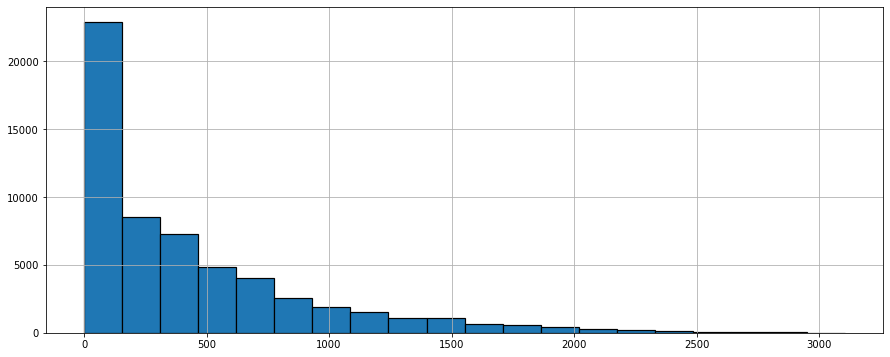

In [44]:
# Distribution of the number of days b/w last & first reviews
df_all['time_since_first_review'].hist(figsize=(15,6),bins=20,edgecolor='black', linewidth=1.2)

The above histogram shows that most of the listings have *new reviews or have joined recently*. Vast majority of the distribution has joined/got reveiws with in the past two years.  

In [46]:
df_all['time_since_first_review'] = pd.cut(df_all['time_since_first_review'],
                                     bins=[0, 182, 365, 730, 1460, max(df_all.time_since_first_review)],
                                     labels=['0-6 months','6-12 months','1-2 years','2-3 years','4+ years'],
                                     include_lowest=True)

In [49]:
df_all['time_since_first_review'].value_counts()

0-6 months     24585
no reviews     15822
1-2 years      12188
6-12 months     9647
2-3 years       8642
4+ years        3038
Name: time_since_first_review, dtype: int64

In [48]:
df_all['time_since_first_review'] = df_all['time_since_first_review'].astype('str')
df_all['time_since_first_review'].replace('nan','no reviews',inplace=True)

#### `review_scores_rating`

In [50]:
df_all['review_scores_rating'] = pd.cut(df_all['review_scores_rating'],
                                     bins = [0,80,95,100],
                                     labels = ['0-79/100','80-94/100','95-100/100'],
                                     include_lowest=True)

In [51]:
#converting the column to string
df_all['review_scores_rating'] = df_all['review_scores_rating'].astype('str')

#Replace null values with 'unknown' category
df_all['review_scores_rating'].replace('nan','no reviews',inplace=True)

#category counts
df_all['review_scores_rating'].value_counts()

95-100/100    31316
80-94/100     22060
no reviews    16675
0-79/100       3871
Name: review_scores_rating, dtype: int64

In [52]:
# Replacing columns with f/t with 0/1
df_all.replace({'f': 0, 't': 1}, inplace=True)

In [53]:
df_all.select_dtypes('object').columns

Index(['property_type', 'room_type', 'cancellation_policy', 'city',
       'description', 'host_response_rate', 'name', 'neighbourhood',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'data',
       'time_since_first_review'],
      dtype='object')

In [54]:
# dropping few host related column which contribute none towards price prediction.

cols_to_drop = ['thumbnail_url','name']
df_all = df_all.drop(cols_to_drop, axis=1)

In [57]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73922 entries, 0 to 24110
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       73922 non-null  int64         
 1   property_type            73922 non-null  object        
 2   room_type                73922 non-null  object        
 3   accommodates             73922 non-null  int64         
 4   bathrooms                73922 non-null  float64       
 5   cancellation_policy      73922 non-null  object        
 6   cleaning_fee             73922 non-null  bool          
 7   city                     73922 non-null  object        
 8   description              73921 non-null  object        
 9   first_review             58100 non-null  datetime64[ns]
 10  host_has_profile_pic     73922 non-null  int64         
 11  host_identity_verified   73922 non-null  int64         
 12  host_response_rate       73922 n

In [56]:
cleaned_data = df_all.to_csv('cleaned_data.csv', index=False,header=True)